# LINEAR-REGRESSION


In [6]:
#FIRST WE HAVE TO IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## LOAD THE DATASETS

In [7]:
calories = pd.read_csv(r"C:\Users\ravik\Downloads\calories.csv")
exercise = pd.read_csv(r"C:\Users\ravik\Downloads\exercise.csv")

In [8]:
#show the top  five items of  exercise datset
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
#show the top  five items of  calories datset
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [10]:
#information about the calories datset
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [13]:
#show the num values sum in  the dataset
exercise.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [14]:
calories.isnull().sum()

User_ID     0
Calories    0
dtype: int64

In [15]:
# Let's merge both the datasets on USER_ID column

df = pd.merge(exercise, calories, on = 'User_ID')

In [16]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [17]:
df['Intercept'] = 1


In [18]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intercept
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1


In [20]:
df.shape

(15000, 10)

## VISUALIZE THE DATASET

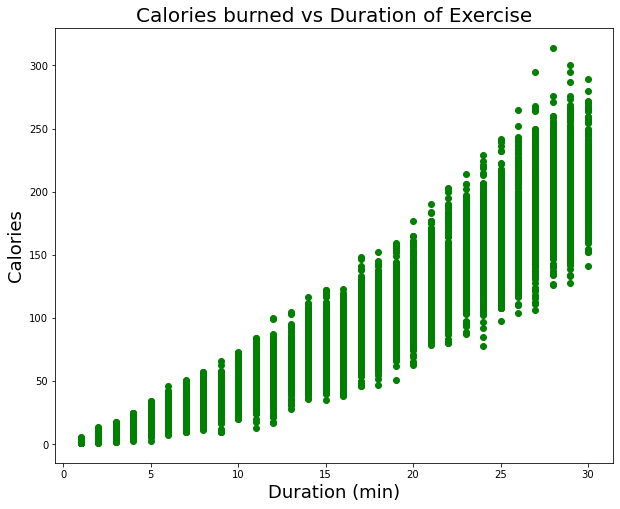

In [21]:
# Visualizing the effect of exercise minutes on calories burned
plt.figure(figsize=(10, 8))
plt.plot(df['Duration'], df['Calories'], 'go');
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [23]:
#Now let's create the feature and response variable

In [24]:
X = df.loc[:, ['Intercept', 'Duration']]
y = df.loc[:, 'Calories']


## DESIGN AND TRAIN THE MACHINE LEARNING MODEL

In [26]:
#First implementing the linear regression without using any libraries



In [27]:
def linear_regression(X,y):
    _coeffs = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
    return _coeffs

by_hand_coefs = linear_regression(X.values, y.values)
print('Intercept without using library:', by_hand_coefs[0])
print('Slope without using library: ', by_hand_coefs[1])

Intercept without using library: -21.85965639967239
Slope without using library:  7.172883837907481


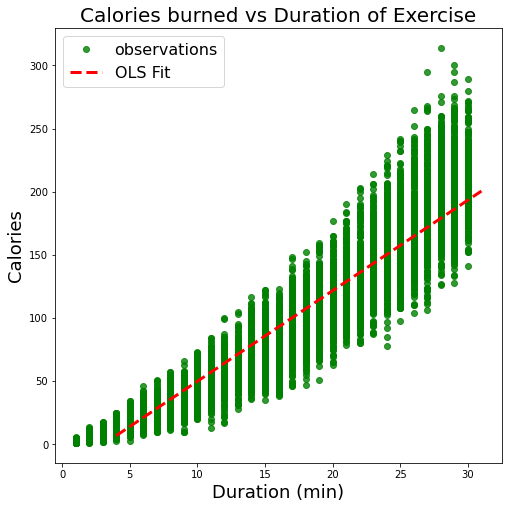

In [28]:
xs = np.linspace(4, 31, 1000)
ys = by_hand_coefs[0] + by_hand_coefs[1] * xs

plt.figure(figsize=(8, 8))

plt.plot(df['Duration'], df['Calories'], 'go',label = 'observations', alpha = 0.8);
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 
plt.plot(xs, ys, 'r--', label = 'OLS Fit', linewidth = 3)
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);

## MAKE PREDICTIONS USING MODEL

In [29]:
# Let's predict something
print(f'Exercising for 35.5 minutes will burn an estimated \
{np.round((by_hand_coefs[0] + by_hand_coefs[1] * 35.5), 2)} calories')

Exercising for 35.5 minutes will burn an estimated 232.78 calories


In [30]:
##Implementing linear regression with the help of the library

In [31]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(np.array(X.Duration).reshape(-1, 1), y)
print('Intercept using library:', linear_regression.intercept_)
print('Slope using library:', linear_regression.coef_[0])

Intercept using library: -21.859656399672232
Slope using library: 7.172883837907459
